# IMPORT DATA

In [1]:
import pandas as pd
df = pd.read_csv("/Users/matthewchapman/Downloads/ml_project1_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# MANIPULATE DATA

## Convert All Variables to Numeric

#### Convert Year_Birth to 'Age' and Dt_Customer to Number of Days Enrolled

In [2]:
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['NumDaysEnrolled'] = (datetime.datetime.now() - df['Dt_Customer']).dt.days
df = df.drop("Year_Birth", axis = 1)
df = df.drop("Dt_Customer", axis = 1)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,NumDaysEnrolled
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,66,3901
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,69,3351
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,58,3550
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,39,3377
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,42,3399


#### Categorical Variables

In [3]:
print("Education unique values:",df['Education'].unique())
print("Marital Staus unique values:",df['Marital_Status'].unique())

Education unique values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital Staus unique values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [4]:
###Change 'Alone', 'Absurd', and 'YOLO' to 'Single'
for i in range(len(df)):
    if df.loc[i, 'Marital_Status'] == 'Alone' or df.loc[i, 'Marital_Status'] == 'Absurd' or df.loc[i, 'Marital_Status'] == 'YOLO':
        df.loc[i, 'Marital_Status'] = 'Single'

In [5]:
###Create a new variable for each 'Education' category
dummies = pd.get_dummies(df['Education'])
dummies.columns = ['Ed' + col for col in dummies.columns]
df = pd.concat([df, dummies], axis=1)
df = df.drop('Education', axis=1)

In [6]:
###Create a new variable for each 'Marital_Status' category
dummies1 = pd.get_dummies(df['Marital_Status'])
dummies1.columns = ['Marital' + col for col in dummies1.columns]
df = pd.concat([df, dummies1], axis=1)
df = df.drop('Marital_Status', axis=1)
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Ed2n Cycle,EdBasic,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,1,0,0,0,0,0,1,0
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,1,0,0,0,0,0,1,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,1,0,1,0,0,0


## Summary Columns

###### Total Campaigns Accepted

In [7]:
df['CmpTotal'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

###### Total Revenue

In [8]:
df['Revenue'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [9]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue
0,5524,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,1,0,0,0,1617
1,2174,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,0,0,27
2,4141,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,1,0,0,776
3,6182,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,1,0,0,53
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,1,0,0,0,0,422


## Clean Data

### Nulls

In [10]:
df = df.dropna()

### Outliers

###### Income

In [11]:
from scipy import stats
import numpy as np
z_thresh = 2.5
income_z = np.abs(stats.zscore(df['Income']))
income_outliers = df[income_z > z_thresh]
income_outliers

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue
164,8475,157243.0,0,1,98,20,2,1582,1,2,...,0,0,1,0,1,0,0,0,0,1608
617,1503,162397.0,1,1,31,85,1,16,2,1,...,0,0,1,0,0,0,1,0,0,107
655,5555,153924.0,0,0,81,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,6
687,1501,160803.0,0,0,21,55,16,1622,17,3,...,0,0,1,0,1,0,0,0,0,1717
1300,5336,157733.0,1,0,37,39,1,9,2,0,...,0,1,0,0,0,0,1,0,0,59
1653,4931,157146.0,0,0,13,1,0,1725,2,1,...,1,0,0,0,0,0,1,0,0,1730
2132,11181,156924.0,0,0,85,2,1,2,1,1,...,0,0,1,0,1,0,0,0,0,8
2233,9432,666666.0,1,0,23,9,14,18,8,1,...,1,0,0,0,0,0,1,0,0,62


###### Age

In [12]:
age_z = np.abs(stats.zscore(df['Age']))
age_outliers = df[age_z > z_thresh]
age_outliers

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue
192,7829,36640.0,1,0,99,15,6,8,7,4,...,0,0,0,1,0,0,0,0,0,65
239,11004,60182.0,0,1,23,8,0,5,7,0,...,0,0,0,0,0,1,0,0,0,22
339,1150,83532.0,0,0,36,755,144,562,104,64,...,0,0,1,0,0,0,1,0,1,1853


###### Number of Days Enrolled

In [13]:
enrolled_z = np.abs(stats.zscore(df['NumDaysEnrolled']))
enrolled_outliers = df[enrolled_z > z_thresh]
enrolled_outliers

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue


###### Revenue

In [14]:
revenue_z = np.abs(stats.zscore(df['Revenue']))
revenue_outliers = df[revenue_z > z_thresh]
revenue_outliers.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue
77,7503,75825.0,0,0,40,1032,105,779,137,105,...,1,0,0,0,0,1,0,0,1,2209
248,8867,67546.0,0,0,90,864,134,768,150,38,...,0,0,1,0,1,0,0,0,0,2126
360,7274,78618.0,0,0,87,736,163,818,212,163,...,1,0,0,0,1,0,0,0,1,2153
424,6932,93027.0,0,0,77,1285,42,716,55,0,...,0,0,1,0,1,0,0,0,1,2119
644,1173,77632.0,0,0,73,1200,105,758,0,42,...,0,1,0,0,0,0,1,0,2,2252


###### Remove Outliers

In [15]:
### Removing outliers for income and age leads to best results
df = df[(income_z < z_thresh) & (age_z < z_thresh)]

### Drop ID

In [16]:
df = df.drop('ID', axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,EdGraduation,EdMaster,EdPhD,MaritalDivorced,MaritalMarried,MaritalSingle,MaritalTogether,MaritalWidow,CmpTotal,Revenue
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,1,0,0,0,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,1,0,0,0,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,1,0,0,776
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,1,0,0,53
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,0,1,0,0,0,0,422


# VISUALS

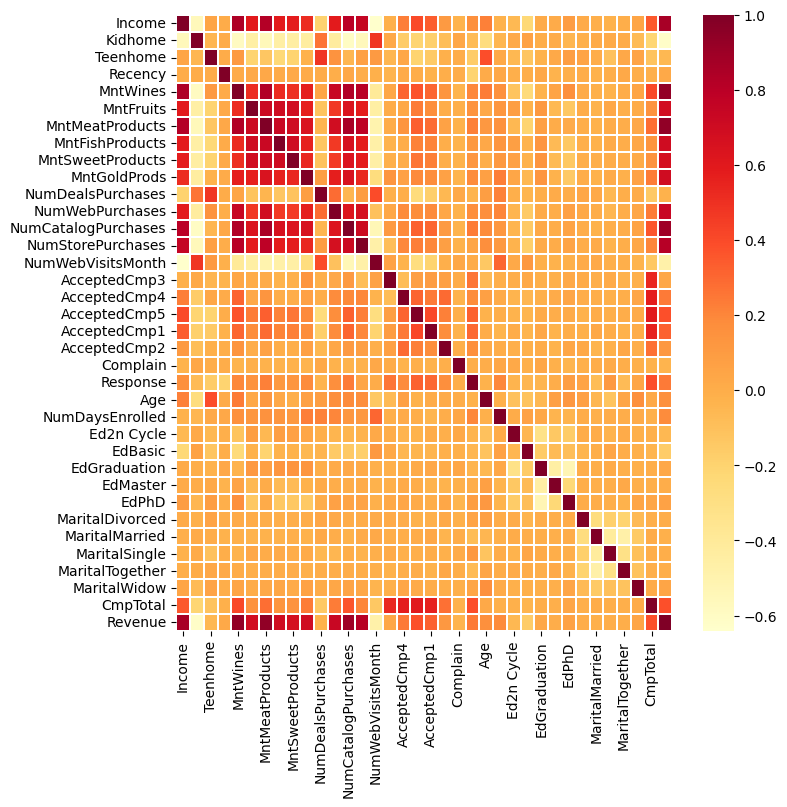

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df_corr = corr.corr(method='spearman')


plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, linewidths=.1, cmap='YlOrRd')
plt.show()

#### Distribution of Customers by Marital Status & Education

/var/folders/t6/k2sv4pd17114sxydzxcdf8j00000gn/T/ipykernel_49543/4045153096.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df1["Marital_Status"].cat.reorder_categories(marital_order, inplace=True)
/var/folders/t6/k2sv4pd17114sxydzxcdf8j00000gn/T/ipykernel_49543/4045153096.py:15: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df1["Education"].cat.reorder_categories(education_order, inplace=True)


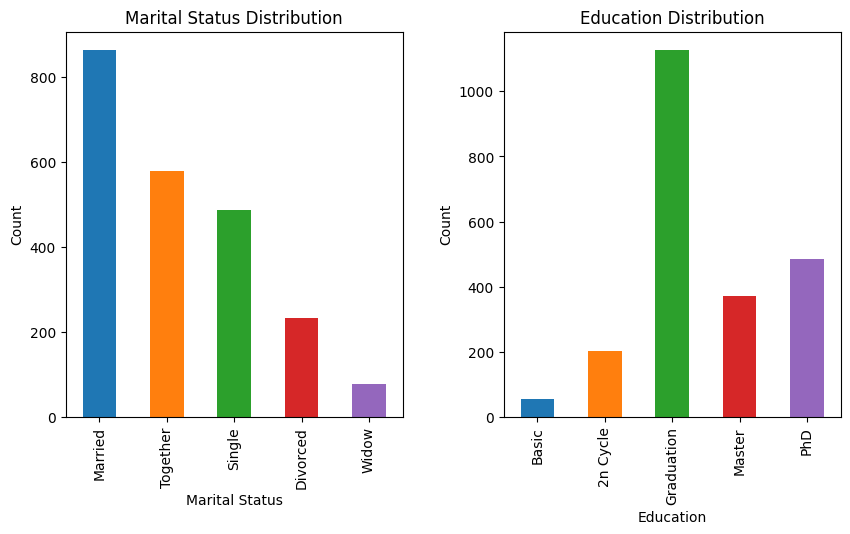

In [18]:
df1 = pd.read_csv("/Users/matthewchapman/Downloads/ml_project1_data.csv")
for i in range(len(df1)):
    if df1.loc[i, 'Marital_Status'] == 'Alone' or df1.loc[i, 'Marital_Status'] == 'Absurd' or df1.loc[i, 'Marital_Status'] == 'YOLO':
        df1.loc[i, 'Marital_Status'] = 'Single'



colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

marital_order = ["Married", "Together", "Single", "Divorced", "Widow"]
education_order = ["Basic", "2n Cycle", "Graduation", "Master", "PhD"]
df1["Marital_Status"] = df1["Marital_Status"].astype("category")
df1["Marital_Status"].cat.reorder_categories(marital_order, inplace=True)
df1["Education"] = df1["Education"].astype("category")
df1["Education"].cat.reorder_categories(education_order, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df1.groupby('Marital_Status').size().plot(kind="bar", ax=ax[0], color=colors)
ax[0].set_xlabel("Marital Status")
ax[0].set_ylabel("Count")
ax[0].set_title("Marital Status Distribution")
df1.groupby('Education').size().plot(kind="bar", ax=ax[1], color=colors)
ax[1].set_xlabel("Education")
ax[1].set_ylabel("Count")
ax[1].set_title("Education Distribution")

plt.subplots_adjust(wspace=0.3)
plt.show()

#### Count of Accepted Offers for Marital Status & Education

/var/folders/t6/k2sv4pd17114sxydzxcdf8j00000gn/T/ipykernel_49543/1594905115.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df1["Marital_Status"].cat.reorder_categories(marital_order, inplace=True)
/var/folders/t6/k2sv4pd17114sxydzxcdf8j00000gn/T/ipykernel_49543/1594905115.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df1["Education"].cat.reorder_categories(education_order, inplace=True)


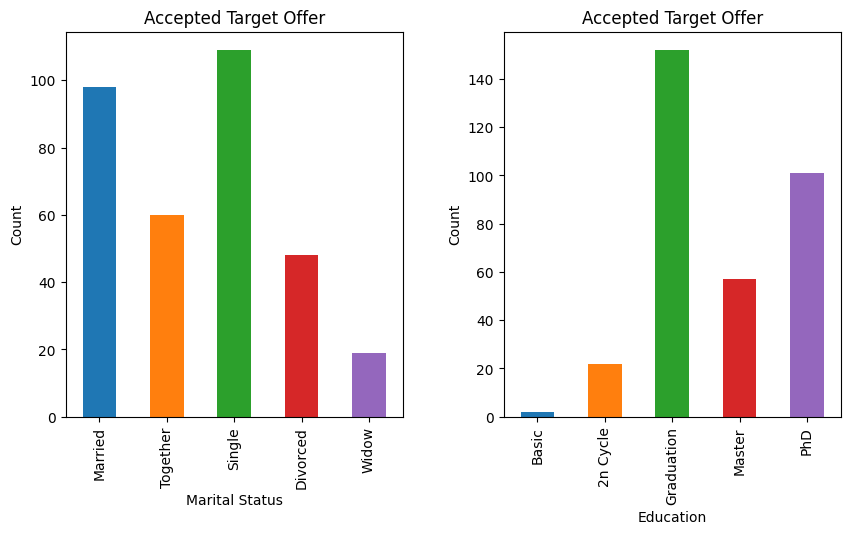

In [19]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

marital_order = ["Married", "Together", "Single", "Divorced", "Widow"]
education_order = ["Basic", "2n Cycle", "Graduation", "Master", "PhD"]
df1["Marital_Status"] = df1["Marital_Status"].astype("category")
df1["Marital_Status"].cat.reorder_categories(marital_order, inplace=True)
df1["Education"] = df1["Education"].astype("category")
df1["Education"].cat.reorder_categories(education_order, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df1[df1['Response']==1].groupby('Marital_Status').size().plot(kind="bar", ax=ax[0], color=colors)
ax[0].set_xlabel("Marital Status")
ax[0].set_ylabel("Count")
ax[0].set_title("Accepted Target Offer")
df1[df1['Response']==1].groupby('Education').size().plot(kind="bar", ax=ax[1], color=colors)
ax[1].set_xlabel("Education")
ax[1].set_ylabel("Count")
ax[1].set_title("Accepted Target Offer")

plt.subplots_adjust(wspace=0.3)
plt.show()

#### Accepted Offers for Each Campaign

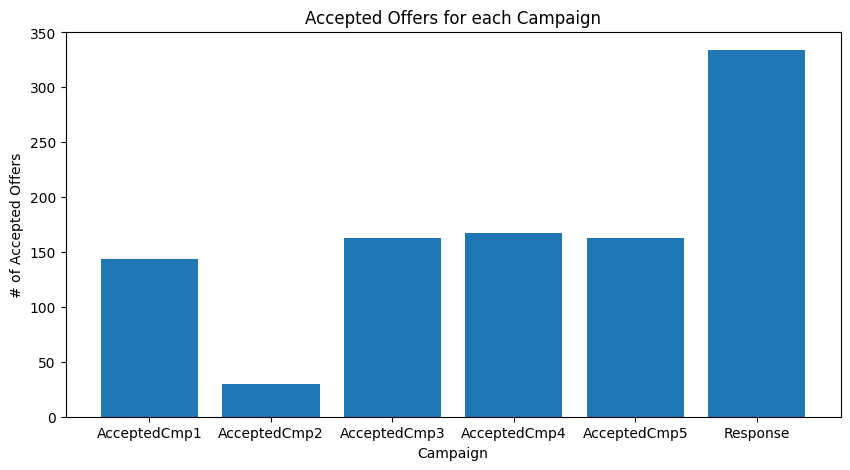

In [20]:
sum_df = df1[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(sum_df.index, sum_df.values)
ax.set_xlabel("Campaign")
ax.set_ylabel("# of Accepted Offers")
ax.set_title("Accepted Offers for each Campaign")


plt.show()

#### Histograms for Data

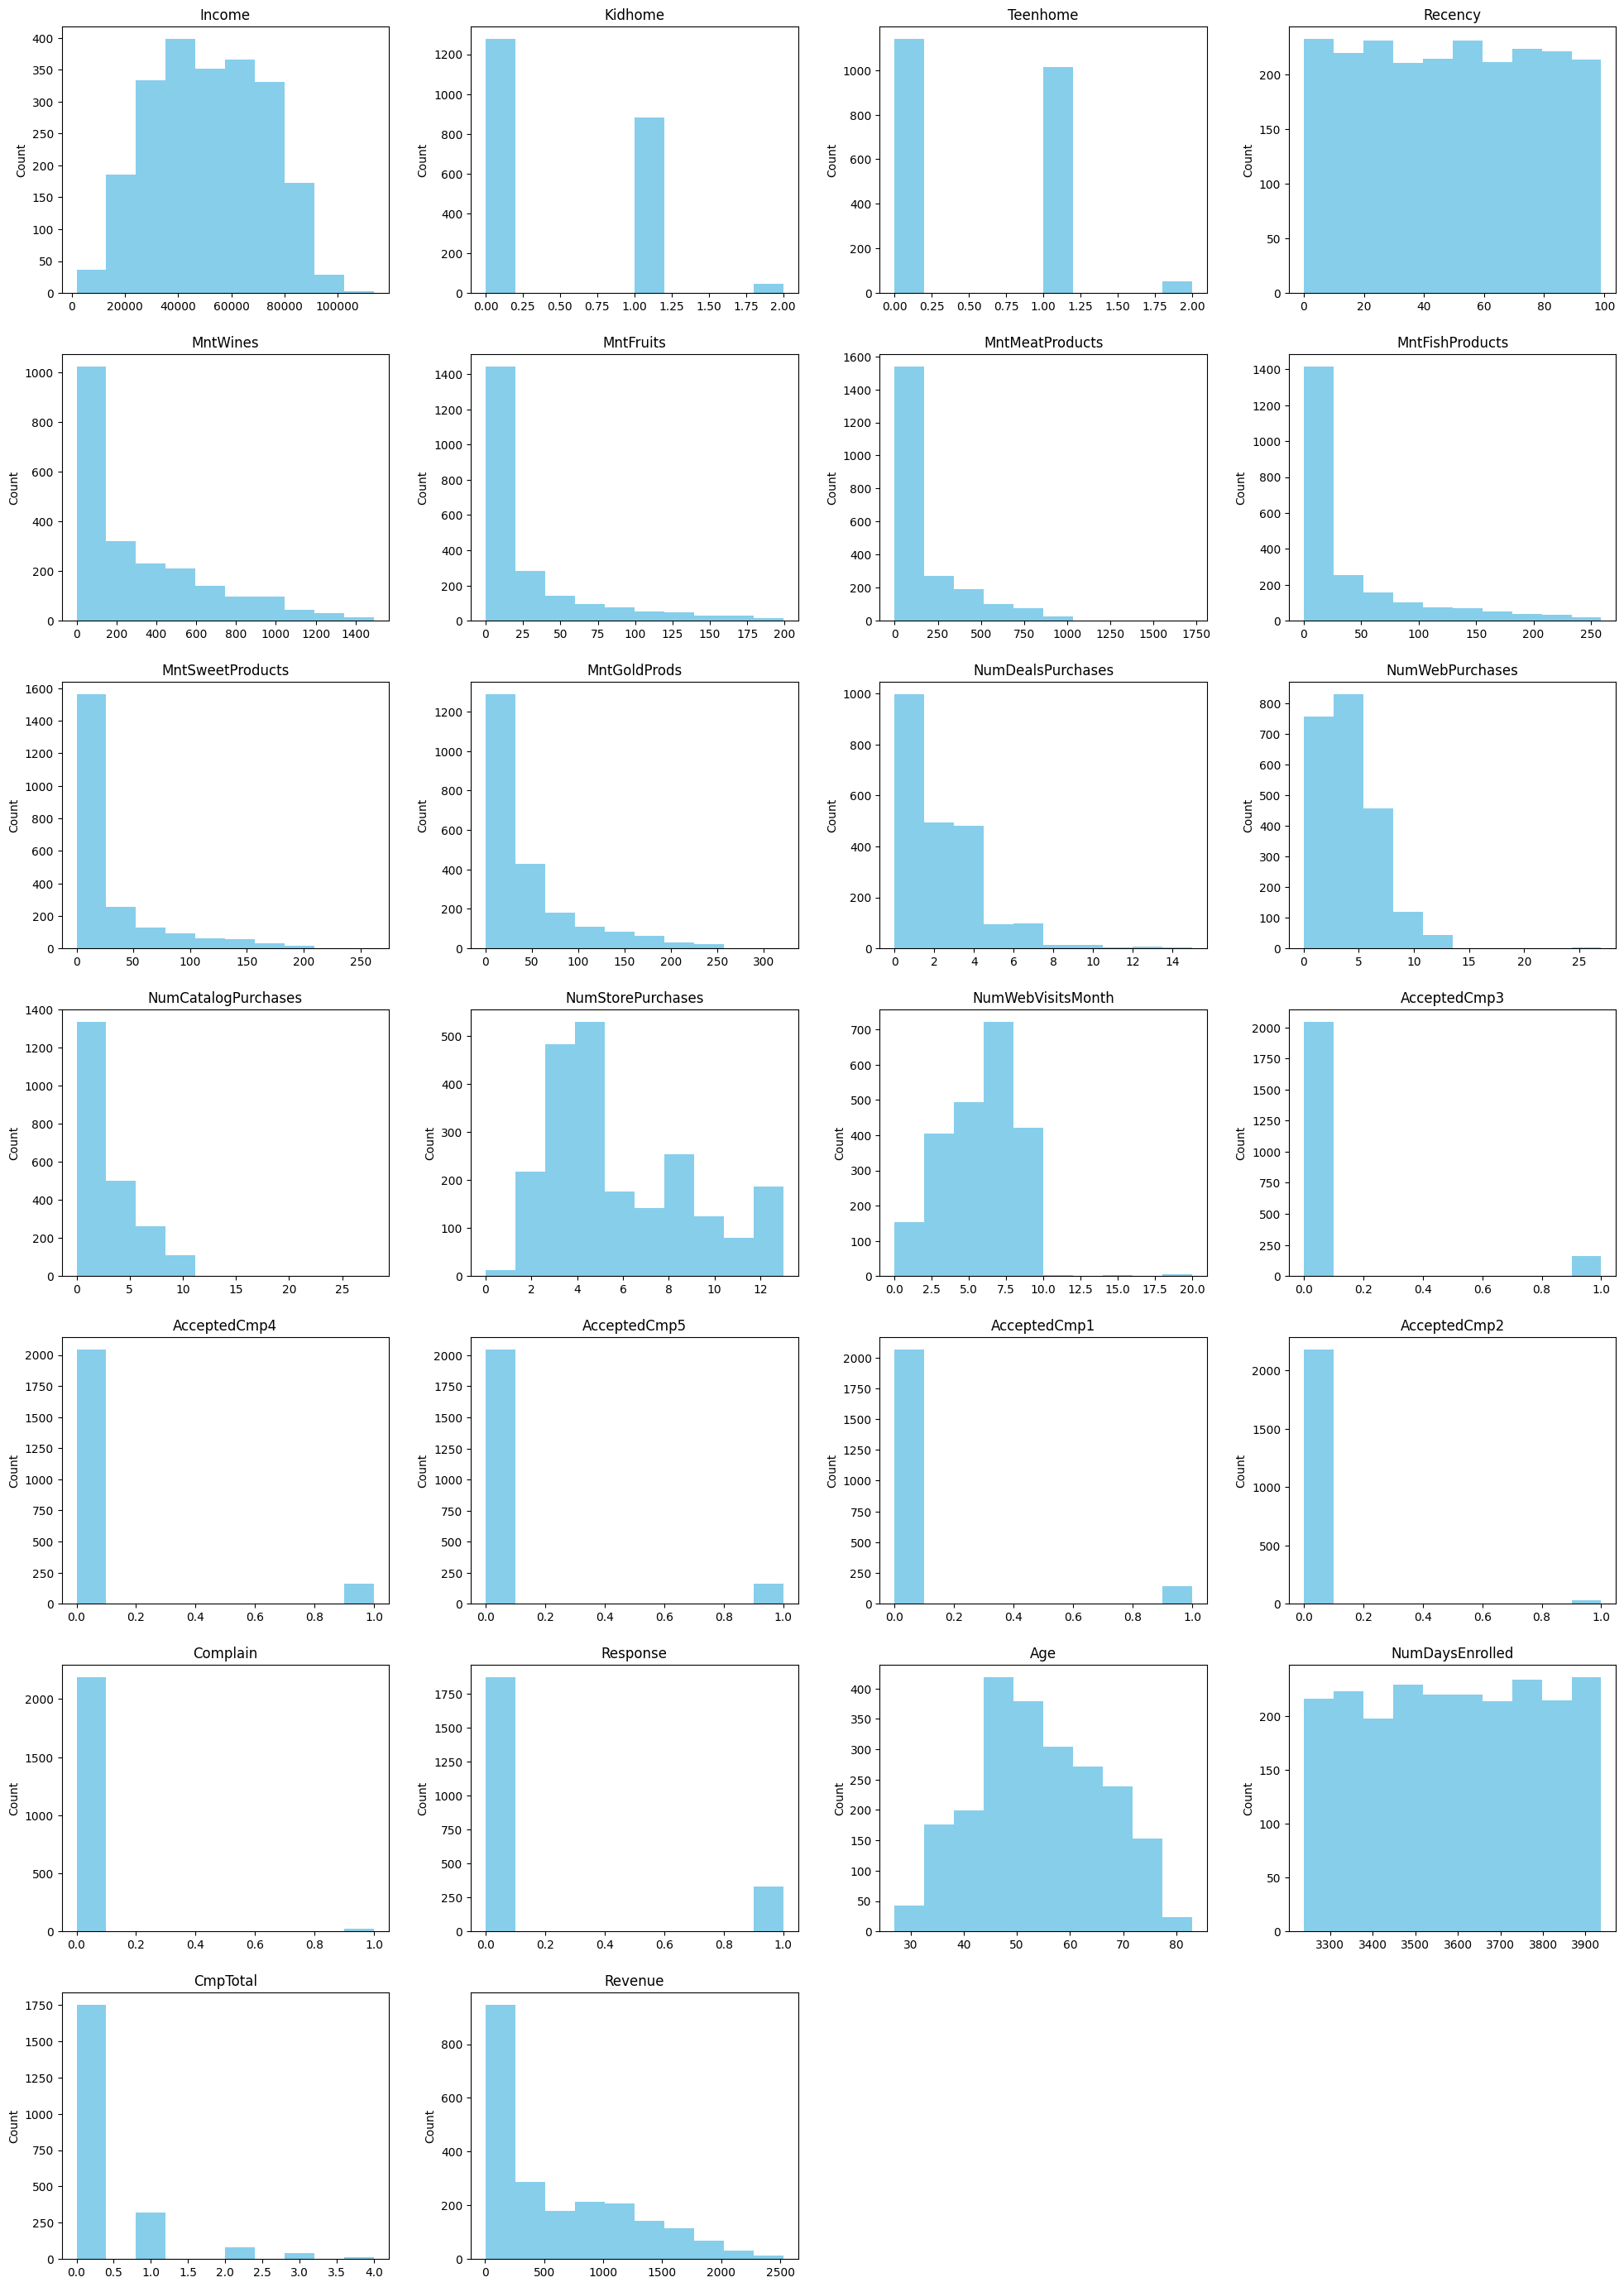

In [21]:
columns = [col for col in df.columns if col not in ['Z_CostContact', 'Z_Revenue', 'Ed2n Cycle', 'EdBasic', 'EdGraduation', 'EdMaster', 'EdPhD', 'MaritalDivorced', 'MaritalMarried', 'MaritalSingle', 'MaritalTogether', 'MaritalWidow']]

nrows = len(columns) // 4 + 1
ncols = min(len(columns), 4)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4*nrows))
axes = axes.flatten()

for i, column in enumerate(columns):
    df[column].plot(kind="hist", ax=axes[i], color="skyblue")
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel("Count")

for i in range(len(columns), nrows * ncols):
    fig.delaxes(axes[i])

fig.tight_layout(pad=2.0)
plt.show()

# LOGISTIC REGRESSION MODEL

#### Create Target Variable (y)

In [22]:
target_variable = 'Response'
y = df[target_variable]
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2205, dtype: int64

#### Create Predictor Variables (x)

In [23]:
predictor_variables = df.drop(columns=[target_variable])
x = predictor_variables.values
x

array([[5.8138e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.6170e+03],
       [4.6344e+04, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.7000e+01],
       [7.1613e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        7.7600e+02],
       ...,
       [5.6981e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.2410e+03],
       [6.9245e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        8.4300e+02],
       [5.2869e+04, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.7200e+02]])

#### Split Data

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

#### Train Model

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state = 42)
log_reg.fit(x_train, y_train)

/Users/matthewchapman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#### Model Predictions

In [26]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Metrics

In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, make_scorer

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Specificity:",specificity)
print("F1:",f1)
print("AUC_ROC:",roc_auc)

Accuracy: 0.8775510204081632
Precision: 0.7368421052631579
Recall: 0.2222222222222222
Specificity: 0.9867724867724867
F1: 0.34146341463414637
AUC_ROC: 0.6044973544973545


#### Confusion Matrix

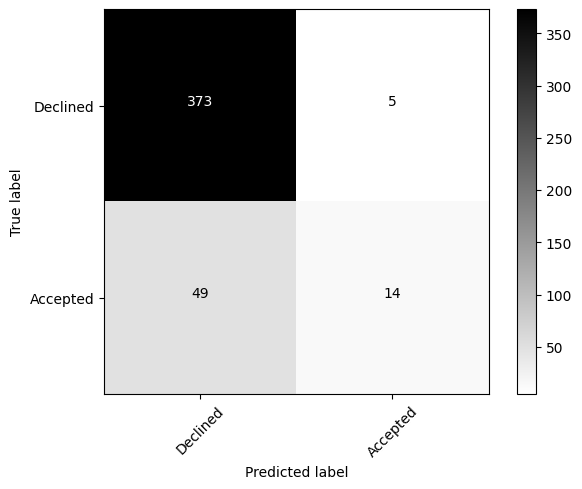

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Declined', 'Accepted']

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          cmap='binary',
                          title=None):
    '''
    This function prints and plots a confusion matrix.
    '''
    if group_names is None:
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    if title is not None:
        plt.title(title)
    
    plt.imshow(cf, cmap=cmap)
    plt.colorbar()
    
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories, rotation=0)
    
    thresh = cf.max() / 2.
    
    for i in range(cf.shape[0]):
        for j in range(cf.shape[1]):
            plt.text(j, i, format(cf[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cf[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')


### Adjust Decision Threshold

In [29]:
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Adjust decision threshold
y_pred = (y_prob > 0.3).astype(int) # example threshold of 0.3

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Specificity:",specificity)
print("F1:",f1)
print("AUC_ROC:",roc_auc)

Accuracy: 0.8480725623582767
Precision: 0.4642857142857143
Recall: 0.4126984126984127
Specificity: 0.9206349206349206
F1: 0.4369747899159664
AUC_ROC: 0.6666666666666667


In [30]:
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Adjust decision threshold
y_pred = (y_prob > 0.2).astype(int) # example threshold of 0.3

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Specificity:",specificity)
print("F1:",f1)
print("AUC_ROC:",roc_auc)

Accuracy: 0.7709750566893424
Precision: 0.33620689655172414
Recall: 0.6190476190476191
Specificity: 0.7962962962962963
F1: 0.43575418994413406
AUC_ROC: 0.7076719576719577


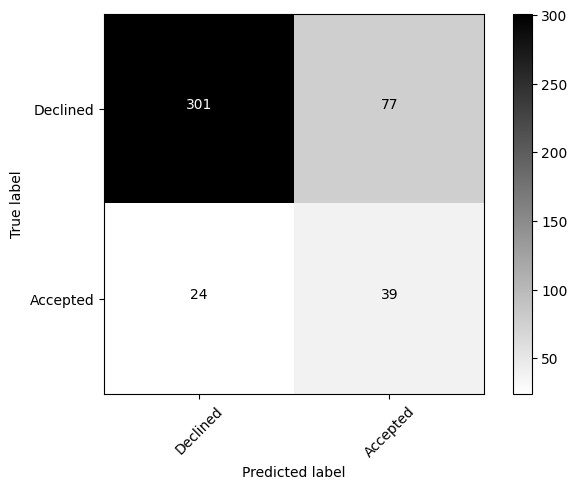

In [31]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

### Repeat Model Using SMOTE

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform SMOTE oversampling on the training set
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Train logistic regression model
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(x_train_res, y_train_res)

# Make predictions on test set
y_pred = log_reg.predict(x_test)

# Calculate metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 score: {:.4f}".format(f1))
print("Specificity: {:.4f}".format(specificity))
print("AUC-ROC: {:.4f}".format(roc_auc))


Accuracy: 0.6871
Precision: 0.2727
Recall: 0.7143
F1 score: 0.3947
Specificity: 0.6825
AUC-ROC: 0.6984


/Users/matthewchapman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


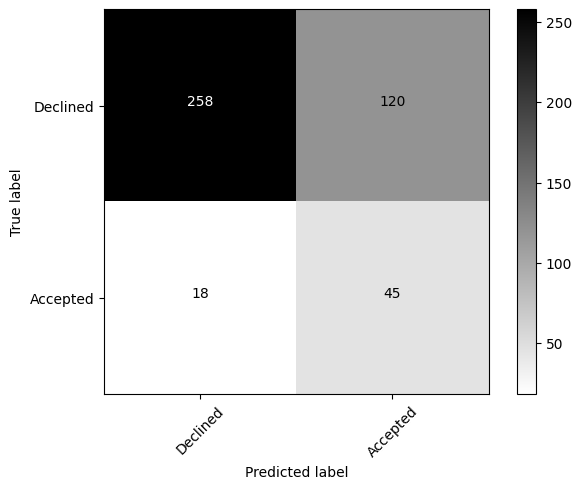

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

### Adjust SMOTE Threshold

In [35]:
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Adjust decision threshold
y_pred = (y_prob > 0.273).astype(int) # example threshold of 0.3
#y_pred = (y_prob > 0.3).astype(int) # example threshold of 0.3

# Calculate metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 score: {:.4f}".format(f1))
print("Specificity: {:.4f}".format(specificity))
print("AUC-ROC: {:.4f}".format(roc_auc))

Accuracy: 0.4331
Precision: 0.1974
Recall: 0.9683
F1 score: 0.3280
Specificity: 0.3439
AUC-ROC: 0.6561


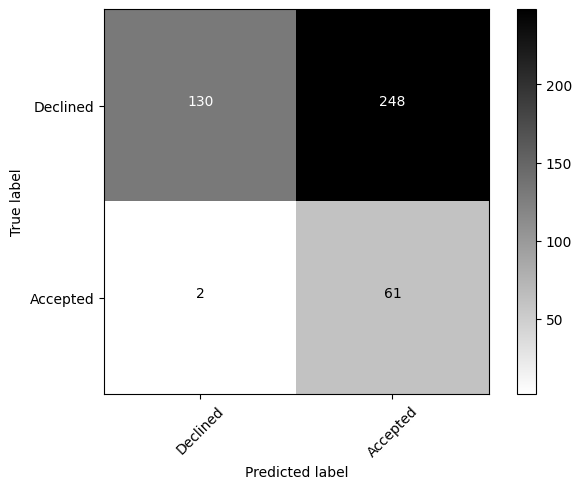

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')
